In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
hdb_string = "HDBdata with district_coord_dist_full_corrected2.csv"
df = pd.read_csv(hdb_string, na_values=0)

# EDA

In [4]:
df.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,858.575938
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,1370.233958
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,896.538505
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,942.352562
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,856.601041


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.847498,6.281778,1.000000,18.000000,19.000000,23.000000,2.800000e+01
District.1,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,1130.106043,615.371712,44.416611,636.790261,1038.576697,1565.223916,5.045443e+03


In [6]:
df[df.mrtdist.isna()]

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist


In [7]:
df_dropped = df.dropna(axis=0)

In [8]:
df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.847498,6.281778,1.000000,18.000000,19.000000,23.000000,2.800000e+01
District.1,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,1130.106043,615.371712,44.416611,636.790261,1038.576697,1565.223916,5.045443e+03


In [9]:
df_dropped.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,858.575938
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,1370.233958
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,896.538505
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,942.352562
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,856.601041


Right off the bat we notice some outliers when it comes to location coordinates

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


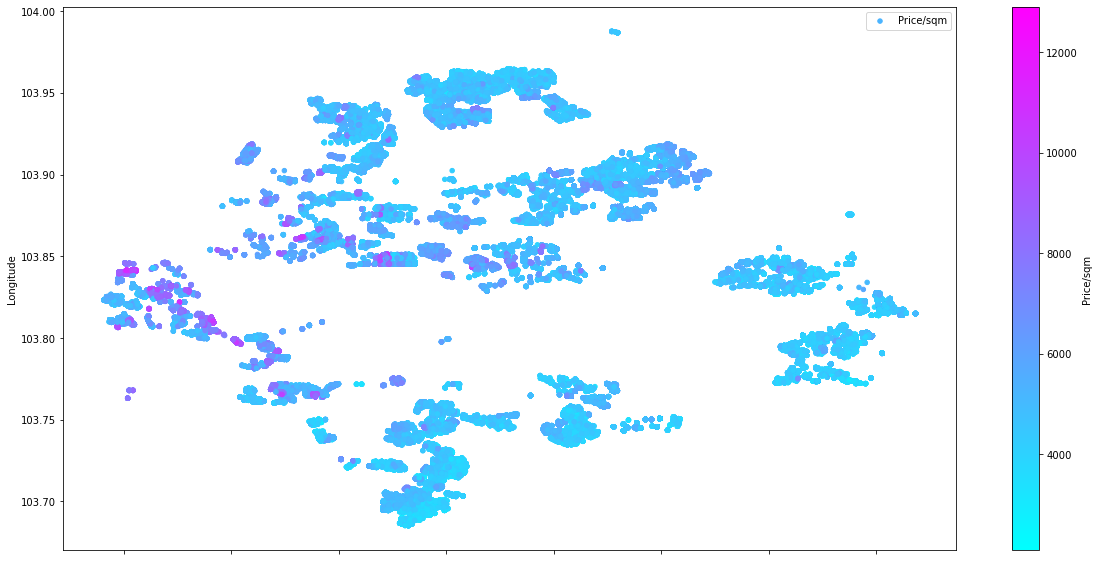

In [10]:
df_dropped.plot(kind='scatter', 
                x = 'Latitude', 
                y= 'Longitude', 
                c ='Price/sqm', 
                label= 'Price/sqm', 
                cmap = 'cool',
                colorbar = True,
                figsize = (20,10))
plt.show()

In [11]:
# Total features dropped are town, lease commence date, block, address and price/sqm

df_dropped.drop(columns=['town','lease_commence_date','Price/sqm','District info','District.1'], inplace = True)
df_dropped.District = df_dropped.District.astype(str)
df_dropped.drop(columns=['street_name','block'], inplace = True)

In [12]:
df_dropped.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,Latitude,Longitude,mrtdist
0,20,1 01 2017,2 ROOM,10 TO 12,44.0,Improved,61,232000.0,1.375748,103.854640,858.575938
1,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,60,250000.0,1.369525,103.837238,1370.233958
2,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,262000.0,1.380760,103.835425,896.538505
3,20,1 01 2017,3 ROOM,04 TO 06,68.0,New Generation,62,265000.0,1.366213,103.857175,942.352562
4,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,265000.0,1.380987,103.835076,856.601041


In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113959 entries, 0 to 113958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   District         113959 non-null  object 
 1   month            113959 non-null  object 
 2   flat_type        113959 non-null  object 
 3   storey_range     113959 non-null  object 
 4   floor_area_sqm   113959 non-null  float64
 5   flat_model       113959 non-null  object 
 6   remaining_lease  113959 non-null  int64  
 7   resale_price     113959 non-null  float64
 8   Latitude         113959 non-null  float64
 9   Longitude        113959 non-null  float64
 10  mrtdist          113959 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 10.4+ MB


# Feature Engineering

In [14]:
## PCA here, DBSCAN

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

polynominal features (degree 2) added in for numerical features below in pipeline

# Modelling

In [15]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

seed_number = 42

In [16]:
y = df_dropped.resale_price
x = df_dropped.loc[:, df_dropped.columns != 'resale_price']

In [17]:
num_cols = x.select_dtypes(['float64','int64']).columns
cat_cols = x.select_dtypes(['object']).columns

In [18]:
df_dropped.shape

(113959, 11)

In [19]:
# Creating training, validation and test sets

X_train, X_temp, y_train, y_temp = train_test_split(x, y ,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [20]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp ,
                                                    test_size = 0.5, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [21]:
print('Shapes')
print('X_train.shape \t' , X_train.shape)
print('X_val.shape \t' , X_val.shape)
print('X_test.shape \t' , X_test.shape)
print('y_train.shape \t' , y_train.shape)
print('y_val.shape \t' , y_val.shape)
print('y_test.shape \t' , y_test.shape)

Shapes
X_train.shape 	 (91167, 10)
X_val.shape 	 (11396, 10)
X_test.shape 	 (11396, 10)
y_train.shape 	 (91167,)
y_val.shape 	 (11396,)
y_test.shape 	 (11396,)


In [22]:
X_train.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,Latitude,Longitude,mrtdist
70882,23,1 06 2020,4 ROOM,10 TO 12,104.0,Model A,62,1.346244,103.749405,310.651595
88389,13,1 01 2021,3 ROOM,10 TO 12,67.0,Model A,94,1.329476,103.889293,637.971127
42714,22,1 01 2019,3 ROOM,04 TO 06,67.0,New Generation,63,1.348451,103.717384,611.786052
66256,16,1 02 2020,3 ROOM,13 TO 15,67.0,New Generation,58,1.334728,103.928924,2110.665998
61448,18,1 11 2019,EXECUTIVE,13 TO 15,146.0,Apartment,73,1.376877,103.945004,638.883253


In [23]:
# Pipeline needs to include the elimination of the column and feature transformation / engineering

In [24]:
# Pipeline

# Scale numerical variables

num_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# One hot encoding categorical variables

cat_pipline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipline, cat_cols)
])

In [25]:
X_train_preprocessed = preprocess.fit_transform(X_train)

In [26]:
X_val_preprocessed = preprocess.transform(X_val)

In [27]:
X_train_preprocessed.shape

(91167, 143)

In [28]:
X_train_preprocessed[:10]

<10x143 sparse matrix of type '<class 'numpy.float64'>'
	with 260 stored elements in Compressed Sparse Row format>

In [29]:
X_train_preprocessed[0].shape

(1, 143)

In [30]:
X_val_preprocessed.shape

(11396, 143)

In [31]:
def plot_results(score, title):
    
    train_score = score['train_score']
    test_score = score['test_score']
    
    train_score = (-train_score)**(1/2) 
    test_score = (-test_score)**(1/2)
    
    cv = len(score['score_time'])
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax.plot(range(cv), train_score, 'r-', label = 'Training RMSE')
    ax.plot(range(cv), test_score, 'b--', label = 'Validation RMSE')
    ax.set_title(title)
    ax.set_xlabel('K-Folds')
    ax.set_ylabel('Error')
    ax.legend()
    plt.show()

In [32]:
model_list = {'Linear Regression':LinearRegression(), 
              'Lasso':Lasso(),
              'Ridge': Ridge(), 
              'Light Gradient Boosting Machine' : lgb.LGBMRegressor(random_state=seed_number),
              'Extreme Gradient Boosting Machine' : xgb.XGBRegressor(random_state=seed_number),
              'Decision Tree' :DecisionTreeRegressor(),
              'Random Forest' :RandomForestRegressor()
             }

In [33]:
# Check for overfitting, shortlisting models

In [34]:
def plot_results_wtrain(score, title):
    
    train_score = score['train_score']
    test_score = score['test_score']
    
    train_score = (-train_score)**(1/2) 
    test_score = (-test_score)**(1/2)
    
    cv = len(score['score_time'])
    
    plt.plot(range(cv), train_score, 'r-', label = 'Training RMSE')
    plt.plot(range(cv), test_score, 'b--', label = 'Validation RMSE')
    plt.title(title)
    plt.xlabel('K-Folds')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

In [35]:
from sklearn.model_selection import cross_validate

Model is  Linear Regression
Mean Train RMSE 48728.03159851424
Train RMSE  [-2367637725.2878537, -2366133437.4842014, -2365557902.4385633, -2356901302.0445824, -2370579141.0484767, -2354414667.3649273, -2401307155.720793, -2415635918.7311444, -2346023418.9021997, -2400526438.851671]
Val RMSE  [-2630491231.952927, -2642604607.0465665, -2623900523.1399975, -2774371533.7249894, -2737656549.8044014, -2776671444.1326427, -2296687196.2237606, -2175471898.4885473, -2840134335.8781805, -2316089187.414217]
Mean Val RMSE  50759.20556925617


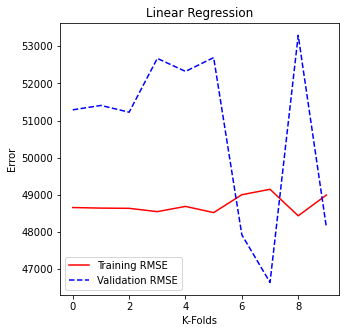

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556718164195.1631, tolerance: 12555542038.48529
  max_iter, tol, rng, random, positive)


Model is  Lasso
Mean Train RMSE 48728.83160794049
Train RMSE  [-2367675246.4167256, -2366201943.673492, -2365656010.234085, -2356970254.304429, -2370667156.3177056, -2354494174.8605585, -2401412012.8781595, -2415724240.6297164, -2346076391.3283324, -2400619855.407466]
Val RMSE  [-2633185841.8802433, -2643249629.081828, -2622223632.5284686, -2781514316.326456, -2734782843.5051007, -2774945614.8590775, -2293891915.967673, -2173532212.1996117, -2838292190.702323, -2313800438.1146326]
Mean Val RMSE  50754.10926415623


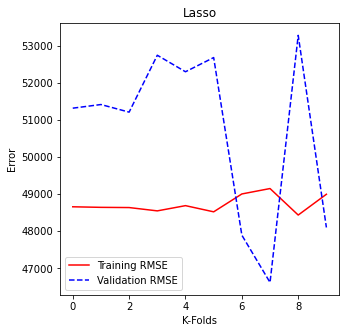

Model is  Ridge
Mean Train RMSE 48934.89118437625
Train RMSE  [-2388837342.068486, -2386909889.235062, -2386788679.268199, -2377274821.5615535, -2386343993.290628, -2374382088.873806, -2425650554.110492, -2434731403.257773, -2367084523.237468, -2418736704.231726]
Val RMSE  [-2685312006.7106805, -2660147933.746748, -2632743483.7860284, -2777519243.647092, -2746207067.0617514, -2742159827.0651636, -2286755954.960169, -2194920311.1817145, -2831135195.641761, -2310248307.651629]
Mean Val RMSE  50812.24307408139


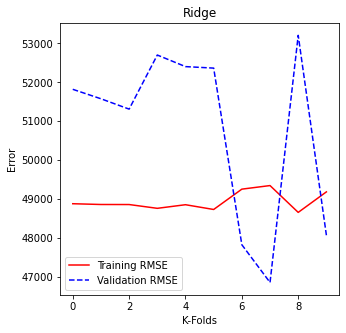

Model is  Light Gradient Boosting Machine
Mean Train RMSE 27236.389573552857
Train RMSE  [-751830964.7799829, -742205360.6221565, -729342766.6137978, -734633872.8506669, -732430086.128794, -756153353.2539989, -745201367.0281719, -749538542.4717683, -733282595.6994326, -743842640.3953964]
Val RMSE  [-1715397472.905608, -1837031147.0648375, -1683343276.053639, -1888332269.9985132, -1836468165.9547162, -1985030608.845046, -1382814517.8208406, -1825043076.5937462, -1875911535.6904852, -1553982921.6395798]
Mean Val RMSE  41880.83074053172


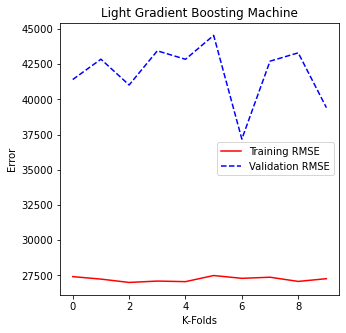

Model is  Extreme Gradient Boosting Machine
Mean Train RMSE 16623.059594337283
Train RMSE  [-282740204.26709074, -278201285.118706, -272445686.42326117, -264450613.8470986, -283632080.8283458, -269802289.4977473, -281263755.3248893, -281387150.40138304, -281500943.0907268, -268236735.4892676]
Val RMSE  [-1877442706.4831626, -1965744126.2860131, -1771941532.1570375, -2486510539.380252, -1950657547.9581034, -1816685242.4899745, -1734253821.2862325, -1595743885.0233667, -2047202069.4415996, -1760295144.8095665]
Mean Val RMSE  43520.740349258864


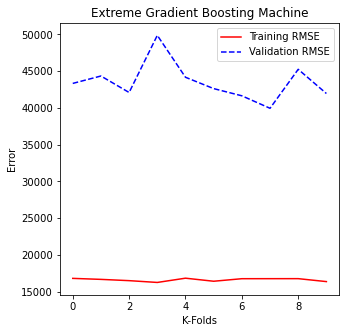

Model is  Decision Tree
Mean Train RMSE 504.02159859759524
Train RMSE  [-217222.22222222222, -324111.1111111111, -58111.11111111111, -324111.1111111111, -324111.1111111111, -324000.0, -161333.33333333334, -275111.1111111111, -323111.1111111111, -315111.1111111111]
Val RMSE  [-4657306496.32, -4379206200.909308, -4248624901.346, -5531221763.304, -4668663374.65, -5362995788.008, -3607464270.862, -4450942532.004, -5195760865.666, -4020535730.326]
Mean Val RMSE  67780.06642396249


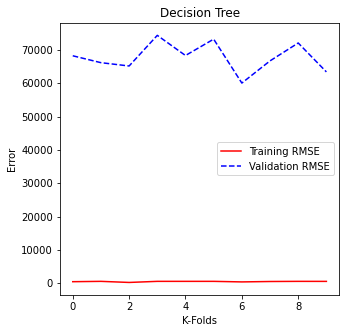

Model is  Random Forest
Mean Train RMSE 18275.67814996849
Train RMSE  [-338193900.6182175, -335235018.11572415, -335954833.9874596, -317249274.7286564, -329951806.7183657, -333438949.5633612, -336876159.7217646, -333356012.56242645, -341191577.49297136, -338864051.89979696]
Val RMSE  [-2311402934.856645, -2582587591.484072, -2168839906.0967817, -2755960724.053927, -2616574308.519003, -2388938364.2092586, -1829247710.5279276, -2196787071.752999, -2629771823.7149005, -2054869597.0473301]
Mean Val RMSE  48424.50674936767


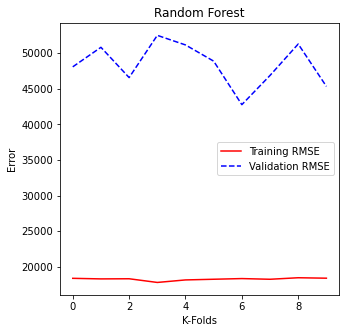

In [36]:
cv = 10
training_samples = 5000

train_rmse_list = []
val_rmse_list = []

for name , model in model_list.items():
    model_instance = model.fit(X_train_preprocessed[:training_samples], y_train[:training_samples])
    
    model_cv_score = cross_validate(model_instance,X_train_preprocessed[:training_samples], y_train[:training_samples], scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1,return_train_score= True )
    
    #model_cv_rmse = (-model_cv_score)**(1/2)
    
    # with open(name+'_pkl.pkl', 'wb') as files:
    #     pickle.dump(model, files)
    
    # with open(name+'_results_pkl', 'wb') as files:
    #     pickle.dump(model, files)
    
    train_rmse_list.append(model_cv_score['train_score'])
    val_rmse_list.append(model_cv_score['test_score'])
    
    print('Model is ', name)
    print('Mean Train RMSE', ((-model_cv_score['train_score'])**(1/2)).mean())
    print('Train RMSE ', list(model_cv_score['train_score']))
    print('Val RMSE ' , list(model_cv_score['test_score']))
    print('Mean Val RMSE ' , ((-model_cv_score['test_score'])**(1/2)).mean())

    plot_results(model_cv_score, name)

Random Forest and Decision Tree clearly overfits too much. Light GBM is quick , XGB is slower to tune

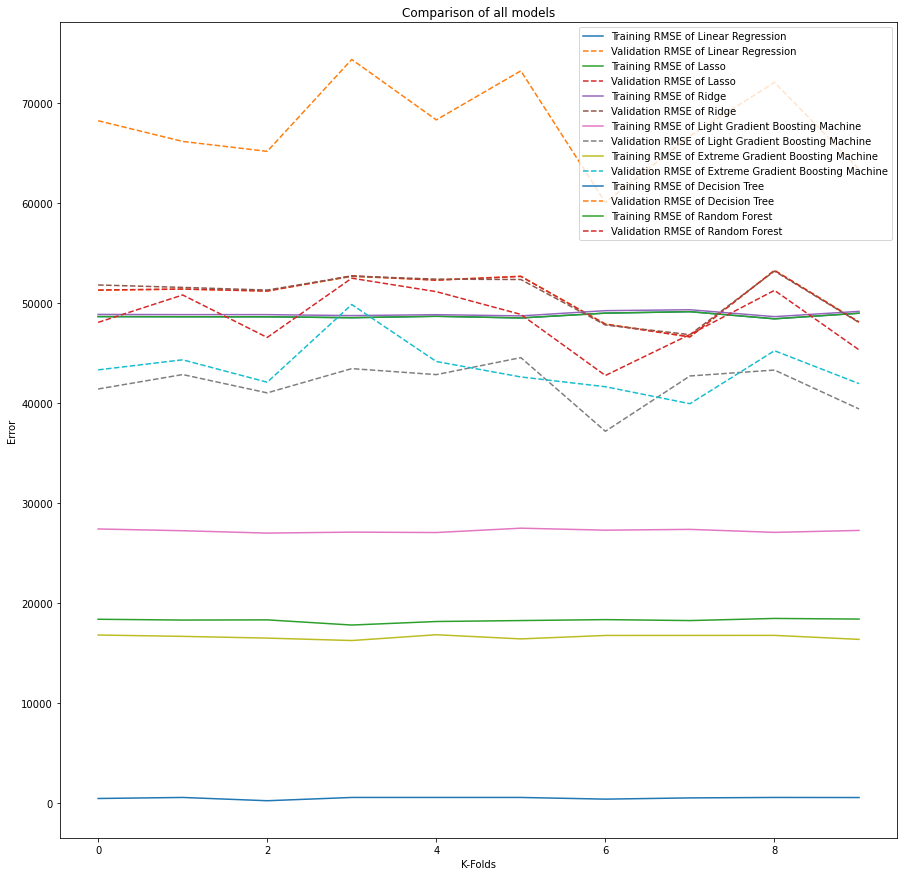

In [37]:
fig, ax = plt.subplots(figsize = (15,15))

for index, model_name in enumerate(model_list.keys()):
    
    train_rmse_list
    
    ax.plot(range(len(val_rmse_list[index])), ((-train_rmse_list[index])**(1/2)),label = 'Training RMSE of ' + model_name)
    ax.plot(range(len(val_rmse_list[index])), ((-val_rmse_list[index])**(1/2)), '--' , label = 'Validation RMSE of ' + model_name)

ax.set_title('Comparison of all models')
ax.set_xlabel('K-Folds')
ax.set_ylabel('Error')
ax.legend()
plt.show()

In [38]:
# Hyperparameter Tunning for selected models

In [39]:
params = {'max_bin': [300,350,400],
          'learning_rate': np.arange(0.1,0.5,0.2),
          'num_leaves': range(300,360,20),
         'random_state': [seed_number]}

cv = 3

lgb = lgb.LGBMRegressor(random_state = seed_number)

cv = GridSearchCV(lgb,param_grid = params, scoring = 'neg_mean_squared_error', cv=3)

lgb_cv = cv.fit(X_train_preprocessed, y_train)


print(lgb_cv.best_params_)

{'learning_rate': 0.1, 'max_bin': 350, 'num_leaves': 340, 'random_state': 42}


In [40]:
lgb_score = (-lgb_cv.best_score_)**(1/2)
print(lgb_score)

27063.24726899044


In [41]:
params = {'eta': [0.1,0.3,0.5,0.7],
          'max_depth': range(4,12,2),
          'max_leaves': range(0,4,2),
          'max_bin' : [0,32,64,128,256],
         'random_state': [seed_number]}

cv = 3

xgb_model = xgb.XGBRegressor(random_state = seed_number)

cv = GridSearchCV(xgb_model,param_grid = params, scoring = 'neg_mean_squared_error', cv=3)

xgb_model_cv = cv.fit(X_train_preprocessed, y_train)


print(xgb_model_cv.best_params_)

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\xgboost\sklearn.py", line 800, in fit
    callbacks=callbacks,
  File "C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\xgboost\training.py", line 196, in train
    early_stopping_rounds=early_stopping_rounds)
  File "C:\Users\Randy\anaconda3\envs\IBM Data Science Proje

{'eta': 0.3, 'max_bin': 32, 'max_depth': 10, 'max_leaves': 0, 'random_state': 42}


In [42]:
xgb_model_cv_score = (-xgb_model_cv.best_score_)**(1/2)
print(xgb_model_cv_score)

28897.583439745813


In [43]:
# Feature importance

In [44]:
len(lgb_cv.best_estimator_.feature_importances_)

143

In [45]:
print(lgb_cv.best_estimator_.feature_importances_)

[   0 1695 1205 1813 1526 1278  564 1620 1426 1112 1297  615 1762 1633
 1309 1062 1532 1239 1535 1230  966   65    0   77   14   27    8   11
    0   17   34   34  168   52   25   42    5    6   12   54   34   29
    2   28   14   21   40   69   40   17   24   38   79   60   38   35
   31  103   42   33   29   15  128   50   15   41   10  128   38   25
   37   39  156   19   23   31   27  202   34   30   33   39  234   22
   24   40   38  236   33   19   35   29  288   23   25   34   42  282
   17   19   30   66    7   25   76   45   45   10  301  238  275  263
  247  185  176  120   99   63   66   76   61   21   12    0   20   62
  121  142    0   80  145   21   18    0   52  134    0    0   35   52
   62    7    6]


https://towardsdatascience.com/how-to-get-feature-importances-from-any-sklearn-pipeline-167a19f1214

In [46]:
preprocess.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('ss', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures())]),
                                 Index(['floor_area_sqm', 'remaining_lease', 'Latitude', 'Longitude',
       'mrtdist'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['District', 'month', 'flat_type', 'storey_range', 'flat_model'], dtype='object'))])>

In [47]:
code_list = ['x0','x1','x2','x3','x4']

In [48]:
map_dict = {}

for index , item in enumerate(code_list):
    map_dict[item] = num_cols[index]

In [49]:
map_dict

{'x0': 'floor_area_sqm',
 'x1': 'remaining_lease',
 'x2': 'Latitude',
 'x3': 'Longitude',
 'x4': 'mrtdist'}

In [50]:
len(preprocess.named_transformers_['num']['poly'].get_feature_names())

21

In [51]:
num_transformed_list = preprocess.named_transformers_['num']['poly'].get_feature_names()

In [52]:
num_transformed_list

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2']

In [53]:
for index, item in enumerate(num_transformed_list):
    for key, value in map_dict.items():
        if key in item: 
            num_transformed_list[index] = num_transformed_list[index].replace(key,value)

In [54]:
num_transformed_list

['1',
 'floor_area_sqm',
 'remaining_lease',
 'Latitude',
 'Longitude',
 'mrtdist',
 'floor_area_sqm^2',
 'floor_area_sqm remaining_lease',
 'floor_area_sqm Latitude',
 'floor_area_sqm Longitude',
 'floor_area_sqm mrtdist',
 'remaining_lease^2',
 'remaining_lease Latitude',
 'remaining_lease Longitude',
 'remaining_lease mrtdist',
 'Latitude^2',
 'Latitude Longitude',
 'Latitude mrtdist',
 'Longitude^2',
 'Longitude mrtdist',
 'mrtdist^2']

In [55]:
cat_cols

Index(['District', 'month', 'flat_type', 'storey_range', 'flat_model'], dtype='object')

In [56]:
map_dict = {}

for index , item in enumerate(code_list):
    map_dict[item] = cat_cols[index]

In [57]:
map_dict

{'x0': 'District',
 'x1': 'month',
 'x2': 'flat_type',
 'x3': 'storey_range',
 'x4': 'flat_model'}

In [58]:
preprocess.named_transformers_['cat']['ohe'].get_feature_names()

array(['x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14', 'x0_15', 'x0_16',
       'x0_17', 'x0_18', 'x0_19', 'x0_2', 'x0_20', 'x0_21', 'x0_22',
       'x0_23', 'x0_25', 'x0_27', 'x0_28', 'x0_3', 'x0_4', 'x0_5', 'x0_7',
       'x0_8', 'x1_1 01 2018', 'x1_1 01 2019', 'x1_1 01 2020',
       'x1_1 01 2021', 'x1_1 02 2017', 'x1_1 02 2018', 'x1_1 02 2019',
       'x1_1 02 2020', 'x1_1 02 2021', 'x1_1 03 2017', 'x1_1 03 2018',
       'x1_1 03 2019', 'x1_1 03 2020', 'x1_1 03 2021', 'x1_1 04 2017',
       'x1_1 04 2018', 'x1_1 04 2019', 'x1_1 04 2020', 'x1_1 04 2021',
       'x1_1 05 2017', 'x1_1 05 2018', 'x1_1 05 2019', 'x1_1 05 2020',
       'x1_1 05 2021', 'x1_1 06 2017', 'x1_1 06 2018', 'x1_1 06 2019',
       'x1_1 06 2020', 'x1_1 06 2021', 'x1_1 07 2017', 'x1_1 07 2018',
       'x1_1 07 2019', 'x1_1 07 2020', 'x1_1 07 2021', 'x1_1 08 2017',
       'x1_1 08 2018', 'x1_1 08 2019', 'x1_1 08 2020', 'x1_1 08 2021',
       'x1_1 09 2017', 'x1_1 09 2018', 'x1_1 09 2019', 'x1_1 09 2020',
       'x1_1 

In [59]:
cat_transformed_list = preprocess.named_transformers_['cat']['ohe'].get_feature_names()

In [60]:
cat_transformed_list

array(['x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14', 'x0_15', 'x0_16',
       'x0_17', 'x0_18', 'x0_19', 'x0_2', 'x0_20', 'x0_21', 'x0_22',
       'x0_23', 'x0_25', 'x0_27', 'x0_28', 'x0_3', 'x0_4', 'x0_5', 'x0_7',
       'x0_8', 'x1_1 01 2018', 'x1_1 01 2019', 'x1_1 01 2020',
       'x1_1 01 2021', 'x1_1 02 2017', 'x1_1 02 2018', 'x1_1 02 2019',
       'x1_1 02 2020', 'x1_1 02 2021', 'x1_1 03 2017', 'x1_1 03 2018',
       'x1_1 03 2019', 'x1_1 03 2020', 'x1_1 03 2021', 'x1_1 04 2017',
       'x1_1 04 2018', 'x1_1 04 2019', 'x1_1 04 2020', 'x1_1 04 2021',
       'x1_1 05 2017', 'x1_1 05 2018', 'x1_1 05 2019', 'x1_1 05 2020',
       'x1_1 05 2021', 'x1_1 06 2017', 'x1_1 06 2018', 'x1_1 06 2019',
       'x1_1 06 2020', 'x1_1 06 2021', 'x1_1 07 2017', 'x1_1 07 2018',
       'x1_1 07 2019', 'x1_1 07 2020', 'x1_1 07 2021', 'x1_1 08 2017',
       'x1_1 08 2018', 'x1_1 08 2019', 'x1_1 08 2020', 'x1_1 08 2021',
       'x1_1 09 2017', 'x1_1 09 2018', 'x1_1 09 2019', 'x1_1 09 2020',
       'x1_1 

In [61]:
for index, item in enumerate(cat_transformed_list):
    for key, value in map_dict.items():
        if key in item: 
            cat_transformed_list[index] = cat_transformed_list[index].replace(key,value)

In [62]:
num_transformed_list.extend(cat_transformed_list)

In [63]:
num_transformed_list

['1',
 'floor_area_sqm',
 'remaining_lease',
 'Latitude',
 'Longitude',
 'mrtdist',
 'floor_area_sqm^2',
 'floor_area_sqm remaining_lease',
 'floor_area_sqm Latitude',
 'floor_area_sqm Longitude',
 'floor_area_sqm mrtdist',
 'remaining_lease^2',
 'remaining_lease Latitude',
 'remaining_lease Longitude',
 'remaining_lease mrtdist',
 'Latitude^2',
 'Latitude Longitude',
 'Latitude mrtdist',
 'Longitude^2',
 'Longitude mrtdist',
 'mrtdist^2',
 'District_10',
 'District_11',
 'District_12',
 'District_13',
 'District_14',
 'District_15',
 'District_16',
 'District_17',
 'District_18',
 'District_19',
 'District_2',
 'District_20',
 'District_21',
 'District_22',
 'District_23',
 'District_25',
 'District_27',
 'District_28',
 'District_3',
 'District_4',
 'District_5',
 'District_7',
 'District_8',
 'month_1 01 2018',
 'month_1 01 2019',
 'month_1 01 2020',
 'month_1 01 2021',
 'month_1 02 2017',
 'month_1 02 2018',
 'month_1 02 2019',
 'month_1 02 2020',
 'month_1 02 2021',
 'month_1 03 2

In [64]:
sorted(zip(lgb_cv.best_estimator_.feature_importances_,preprocess.named_transformers_['num']['poly'].get_feature_names() + \
           preprocess.named_transformers_['cat']['ohe'].get_feature_names().tolist()),reverse = True)

[(1813, 'x2'),
 (1762, 'x1 x2'),
 (1695, 'x0'),
 (1633, 'x1 x3'),
 (1620, 'x0 x1'),
 (1535, 'x3^2'),
 (1532, 'x2 x3'),
 (1526, 'x3'),
 (1426, 'x0 x2'),
 (1309, 'x1 x4'),
 (1297, 'x0 x4'),
 (1278, 'x4'),
 (1239, 'x2 x4'),
 (1230, 'x3 x4'),
 (1205, 'x1'),
 (1112, 'x0 x3'),
 (1062, 'x2^2'),
 (966, 'x4^2'),
 (615, 'x1^2'),
 (564, 'x0^2'),
 (301, 'x3_04 TO 06'),
 (288, 'x1_1 10 2021'),
 (282, 'x1_1 11 2021'),
 (275, 'x3_10 TO 12'),
 (263, 'x3_13 TO 15'),
 (247, 'x3_16 TO 18'),
 (238, 'x3_07 TO 09'),
 (236, 'x1_1 09 2021'),
 (234, 'x1_1 08 2021'),
 (202, 'x1_1 07 2021'),
 (185, 'x3_19 TO 21'),
 (176, 'x3_22 TO 24'),
 (168, 'x0_20'),
 (156, 'x1_1 06 2021'),
 (145, 'x4_Model A'),
 (142, 'x4_Improved'),
 (134, 'x4_Premium Apartment'),
 (128, 'x1_1 05 2021'),
 (128, 'x1_1 04 2021'),
 (121, 'x4_DBSS'),
 (120, 'x3_25 TO 27'),
 (103, 'x1_1 03 2021'),
 (99, 'x3_28 TO 30'),
 (80, 'x4_Maisonette'),
 (79, 'x1_1 02 2021'),
 (77, 'x0_12'),
 (76, 'x3_37 TO 39'),
 (76, 'x2_4 ROOM'),
 (69, 'x1_1 01 2021'),


In [65]:
feature_importance = sorted(zip(lgb_cv.best_estimator_.feature_importances_,num_transformed_list),reverse = True)

In [66]:
# top Ten most important features
feature_importance[:10]

[(1813, 'Latitude'),
 (1762, 'remaining_lease Latitude'),
 (1695, 'floor_area_sqm'),
 (1633, 'remaining_lease Longitude'),
 (1620, 'floor_area_sqm remaining_lease'),
 (1535, 'Longitude^2'),
 (1532, 'Latitude Longitude'),
 (1526, 'Longitude'),
 (1426, 'floor_area_sqm Latitude'),
 (1309, 'remaining_lease mrtdist')]

In [67]:
# bottom ten least important
feature_importance[-10:]

[(5, 'District_25'),
 (2, 'District_7'),
 (0, 'storey_range_49 TO 51'),
 (0, 'flat_model_Premium Maisonette'),
 (0, 'flat_model_Premium Apartment Loft'),
 (0, 'flat_model_Multi Generation'),
 (0, 'flat_model_Improved-Maisonette'),
 (0, 'District_17'),
 (0, 'District_11'),
 (0, '1')]

In [71]:
features_df = pd.DataFrame(feature_importance)

Text(0.5, 1.0, 'Top Ten Relative Feature Importance')

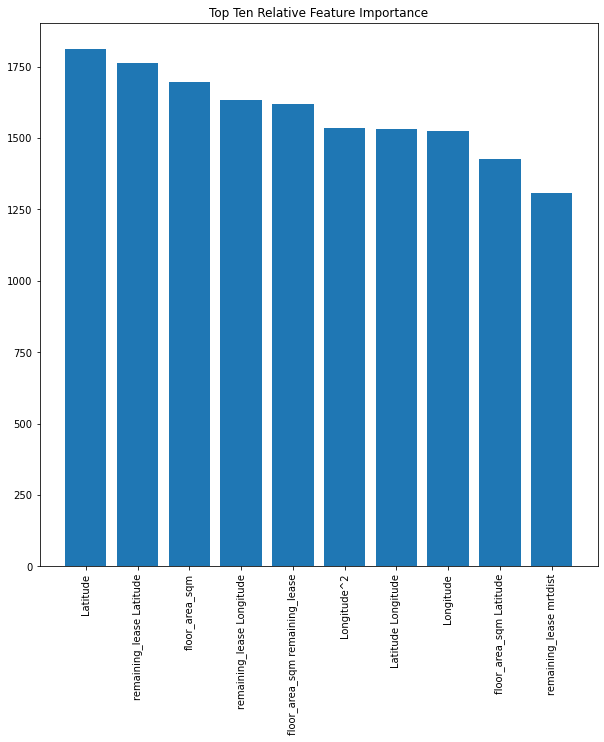

In [83]:
fig = plt.subplots( figsize = (10,10))
plt.bar(features_df[1][:10], height = features_df[0][:10])
plt.xticks(rotation=90)
plt.title('Top Ten Relative Feature Importance')

Text(0.5, 1.0, 'Top Ten Relative Feature Importance')

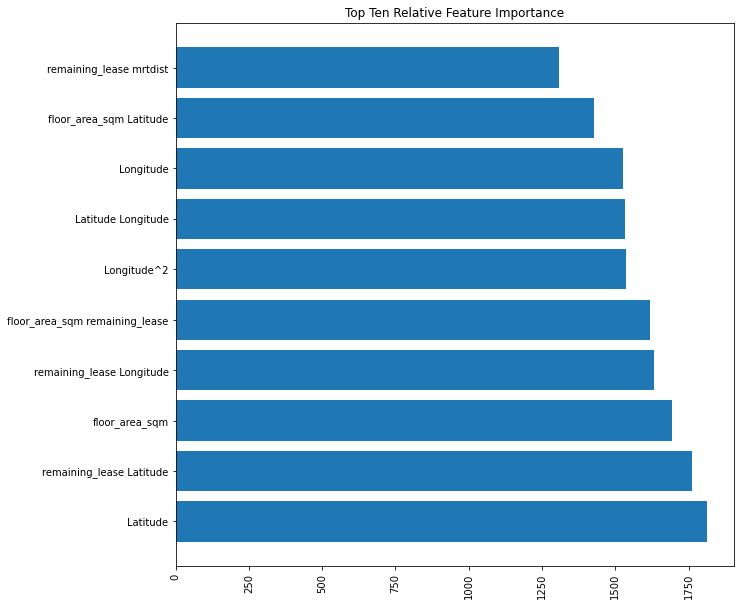

In [86]:
fig = plt.subplots( figsize = (10,10))
plt.barh(features_df[1][:10], width = features_df[0][:10])
plt.xticks(rotation=90)
plt.title('Top Ten Relative Feature Importance')

Text(0.5, 1.0, 'Btm Ten Relative Feature Importance')

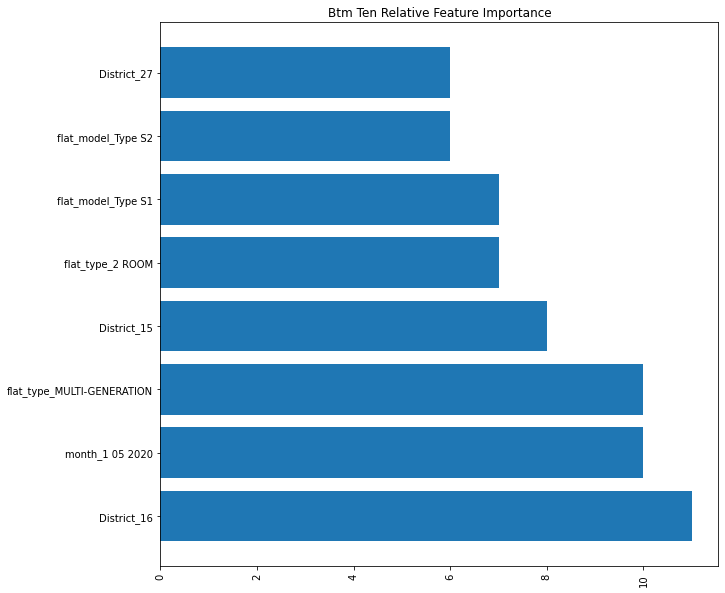

In [90]:
fig = plt.subplots( figsize = (10,10))
plt.barh(features_df[1][-18:-10], width = features_df[0][-18:-10])
plt.xticks(rotation=90)
plt.title('Btm Ten Relative Feature Importance')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

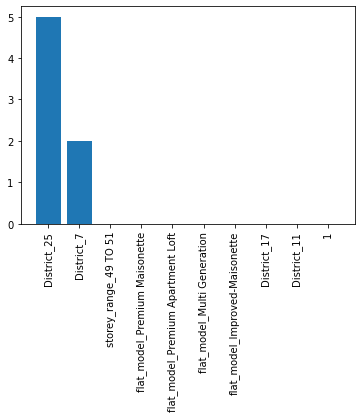

In [77]:
plt.bar(features_df[1][-10:], height = features_df[0][-10:])
plt.xticks(rotation=90)

In [ ]:
y_pred = lgb_cv.predict(preprocess.transform(X_test))

lgb_mse = mean_squared_error(y_test,y_pred)**(1/2)
lgb_mae = mean_absolute_error(y_test,y_pred)
lgb_r2 = r2_score(y_test,y_pred)

print('RMSE on test set', lgb_mse)
print('MAE on test set', lgb_mae)
print('R2 on test set', lgb_r2)

We narrow down to lgbm because of its accuracy and quick training speed 

In [70]:
# Asessing Final model on test set

In [71]:
X_test.iloc[0]

District                   4
month              1 03 2018
flat_type             5 ROOM
storey_range        04 TO 06
floor_area_sqm           117
flat_model          Standard
remaining_lease           56
Latitude             1.27675
Longitude            103.819
mrtdist              1215.37
Name: 23132, dtype: object

In [72]:
y_test.iloc[0]

595000.0

In [73]:
X_test_preprocess = preprocess.transform(X_test)

In [74]:
lgb_cv.predict(X_test_preprocess[0])

array([589287.41699229])

# Deep Learning Model

In [75]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K

In [76]:
def R2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [77]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,input_dim = X_train_preprocessed.shape[1],activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

In [78]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               73728     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 600,065
Trainable params: 600,065
Non-trainable params: 0
_________________________________________________________________


In [79]:
early_callback = tf.keras.callbacks.EarlyStopping(patience=50)

In [80]:
dnn_model.compile(loss = 'mse', 
                  metrics =[tf.metrics.RootMeanSquaredError(),tf.metrics.MeanAbsoluteError(),R2_score],#.,tfa.metrics.RSquare()], 
                  optimizer = tf.keras.optimizers.RMSprop())

In [81]:
# to.array() converts the sparse matrix to numpy array
dnn_model_history = dnn_model.fit(X_train_preprocessed.toarray(), 
                                  np.array(y_train), 
                                  epochs = 250, 
                                  validation_data = [X_val_preprocessed.toarray(), np.array(y_val)], 
                                  batch_size = 32,
                                  callbacks=[early_callback])

Epoch 1/250
2849/2849 [==============================] - 25s 8ms/step - loss: 30964379648.0000 - root_mean_squared_error: 175966.9844 - mean_absolute_error: 102299.2344 - R2_score: -0.3584 - val_loss: 2974378496.0000 - val_root_mean_squared_error: 54537.8633 - val_mean_absolute_error: 40691.9531 - val_R2_score: 0.8753
Epoch 2/250
2849/2849 [==============================] - 23s 8ms/step - loss: 2828560896.0000 - root_mean_squared_error: 53184.2148 - mean_absolute_error: 39527.9492 - R2_score: 0.8764 - val_loss: 2671719936.0000 - val_root_mean_squared_error: 51688.6836 - val_mean_absolute_error: 38652.3945 - val_R2_score: 0.8879
Epoch 3/250
2849/2849 [==============================] - 23s 8ms/step - loss: 2583980288.0000 - root_mean_squared_error: 50832.8672 - mean_absolute_error: 37901.3555 - R2_score: 0.8868 - val_loss: 2451709184.0000 - val_root_mean_squared_error: 49514.7344 - val_mean_absolute_error: 36934.3789 - val_R2_score: 0.8971
Epoch 4/250
2849/2849 [=========================

In [82]:
dnn_model.save('dnn_model.h5')

In [83]:
with open('dnn_model_history_pkl.pkl', 'wb') as files:
    pickle.dump(dnn_model_history, files)

INFO:tensorflow:Assets written to: ram://af588624-8159-41f3-a20b-57452c611477/assets


NotFoundError: 

In [ ]:
dnn_model_history.history.keys()

In [ ]:
def plot_dnn_results(history):
    
    fig , axes = plt.subplots(nrows=2,figsize = (10,10))
    
    rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
        
    axes[0].plot(range(len(rmse)),np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[0].plot(range(len(rmse)),np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[0].set_ylabel('RMSE')
    axes[0].set_xlabel('Epochs')
    axes[0].set_title('Training vs Validation RMSE for Full Training Data')
    axes[0].legend()
    plt.show
    
    rmse = history.history['root_mean_squared_error'][-50:]
    val_rmse = history.history['val_root_mean_squared_error'][-50:]
    
    axes[1].plot(range(len(rmse))[-50:],np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[1].plot(range(len(rmse))[-50:],np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[1].set_ylabel('RMSE')
    axes[1].set_xlabel('Last Epochs')
    axes[1].set_title('Training vs Validation RMSE for last 50 epochs')
    axes[1].legend()
    plt.show

In [ ]:
plot_dnn_results(dnn_model_history)

In [ ]:
X_test_preprocess = preprocess.transform(X_test)

In [ ]:
dnn_model_score = dnn_model.evaluate(X_test_preprocess.toarray(), y_test)

In [ ]:
dnn_model_score

In [ ]:
print('RMSE of Deep Learning Model :' ,dnn_model_score[1])
print('MAE of Deep Learning Model :' ,dnn_model_score[2])
print('R2 score of Deep Learning Model :' ,dnn_model_score[3])

In [ ]:
X_test.iloc[0]

In [ ]:
y_test.iloc[0]

In [ ]:
dnn_model.predict(X_test_preprocess[0])

In [ ]:
mse_train = mean_squared_error(lgb_cv.predict(preprocess.transform(X_train)), y_train)**(1/2)
mse_test = mean_squared_error(lgb_cv.predict(preprocess.transform(X_test)), y_test)**(1/2)

print('mse_train ' , mse_train)
print('mse_test ' , mse_test)

In [ ]:
pickled_model = pickle.load(open('lgm_pkl.pkl', 'rb'))
pickled_model.predict(X_test)

## LSTM